In [1]:
import os
from datasets import load_dataset

/Users/ahava/miniconda3/envs/stt_translation/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
# Get dataset
data_dir = os.getenv("COVOST2_DATASET")
print(data_dir)
cv_4_0 = load_dataset(
    "facebook/covost2",
    "en_de",
    data_dir=data_dir,
    # split="train",
    # streaming=True,
    trust_remote_code=True
)

/Users/ahava/datasets/common_voice/common_voice_4


In [25]:
#cv_4_0 = cv_4_0.select_columns(['audio', 'sentence', 'client_id', "translation"])
print(cv_4_0)

DatasetDict({
    train: Dataset({
        features: ['client_id', 'file', 'audio', 'sentence', 'translation', 'id'],
        num_rows: 289430
    })
    validation: Dataset({
        features: ['client_id', 'file', 'audio', 'sentence', 'translation', 'id'],
        num_rows: 15531
    })
    test: Dataset({
        features: ['client_id', 'file', 'audio', 'sentence', 'translation', 'id'],
        num_rows: 15531
    })
})


In [26]:
data = next(iter(cv_4_0["test"]))
audio = data["audio"]["array"]
sample_rate = data["audio"]["sampling_rate"]
transcription = data["sentence"]
translation = data["translation"]
audio_file = data["audio"]["path"]



In [27]:
print(f"data: {data}")
print(f"Audio array: {audio}")
print(f"Sample rate: {data['audio']['sampling_rate']}")
print(f"Audio shape: {audio.shape}, Sample rate: {sample_rate}")
print(f"Audio length(s): {audio.size / sample_rate:.2f} seconds")
print(f"Transcription: {transcription}")
print(f"translation: {translation}")
print(f"Audio file path: {audio_file}")

data: {'client_id': '0013037a1d45cc33460806cc3f8ecee9d536c45639ba4cbbf1564f1c051f53ff3c9f89ef2f1bf04badf55b3a2e7654c086f903681a7b6299616cff6f67598eff', 'file': '/Users/ahava/datasets/common_voice/common_voice_4/clips/common_voice_en_699711.mp3', 'audio': {'path': '/Users/ahava/datasets/common_voice/common_voice_4/clips/common_voice_en_699711.mp3', 'array': array([-2.09547579e-09, -1.39698386e-09, -6.98491931e-10, ...,
        3.90855348e-10,  6.64385880e-10, -3.89627530e-09], shape=(34944,)), 'sampling_rate': 16000}, 'sentence': '"She\'ll be all right."', 'translation': 'Sie wird schon in Ordnung sein.', 'id': 'common_voice_en_699711'}
Audio array: [-2.09547579e-09 -1.39698386e-09 -6.98491931e-10 ...  3.90855348e-10
  6.64385880e-10 -3.89627530e-09]
Sample rate: 16000
Audio shape: (34944,), Sample rate: 16000
Audio length(s): 2.18 seconds
Transcription: "She'll be all right."
translation: Sie wird schon in Ordnung sein.
Audio file path: /Users/ahava/datasets/common_voice/common_voice_4

In [28]:
from IPython.display import Audio
Audio(audio, rate=sample_rate)

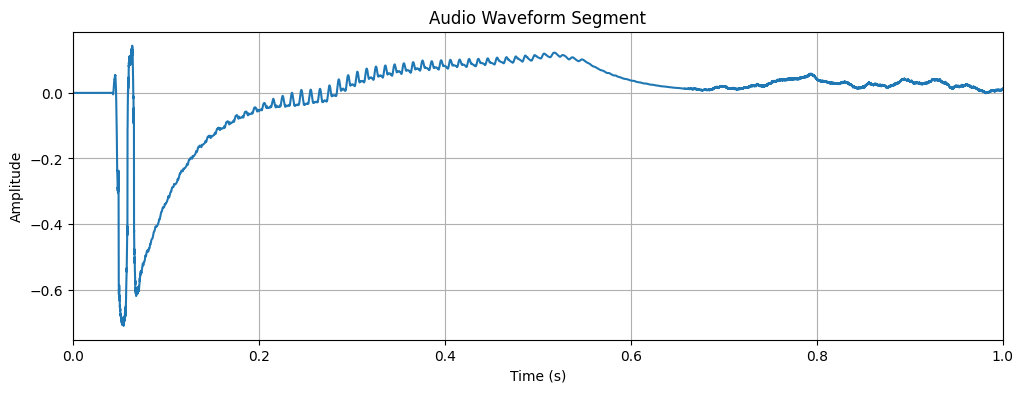

In [7]:
import matplotlib.pyplot as plt
import numpy as np

start_time_ms = 0
end_time_ms = 1000  # 1 second
start_sample = int(start_time_ms * sample_rate / 1000)
end_sample = int(end_time_ms * sample_rate / 1000)
audio_segment = audio[start_sample:end_sample]
plt.figure(figsize=(12, 4))
plt.plot(np.arange(start_sample, end_sample) / sample_rate, audio_segment)
plt.title("Audio Waveform Segment")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(start_time_ms / 1000, end_time_ms / 1000)
plt.grid()
plt.show()

In [ ]:
# Example prediction
print("\nTesting prediction...")
# Use a file from your validation set
data_dir = os.getenv("COVOST2_DATASET")
sample_audio = f"{data_dir}/harvard.wav"  # Change this
if os.path.exists(sample_audio):
    prediction = predict_text(model, sample_audio, text_processor, audio_processor, device)
    print(f"Predicted text: {prediction}")